In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install cleantext

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from cleantext import clean
from keras import utils as np_utils
sns.set_style("whitegrid")
import gensim
import re


all_stopwords = gensim.parsing.preprocessing.STOPWORDS

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hotel_review/Final_Data_Clean.csv", encoding='latin')
data['Clean'].astype(str)

0         i angry post available possible sites use plan...
1         no real complaints hotel great great location ...
2         rooms nice elderly bit difficult rooms story n...
3         my room dirty i afraid walk barefoot floor loo...
4         you when i booked company line showed pictures...
                                ...                        
515733              trolly staff help luggage room location
515734    the hotel looks like surely breakfast ok got e...
515735       the ac useless it hot week vienna gave hot air
515736    the rooms enormous comfortable i believe famil...
515737            i rd floor it t work free wife staff kind
Name: Clean, Length: 515738, dtype: object

In [ ]:
# Data Cleaning

data["Reviews"] = data["Reviews"].apply(lambda x: str (x).replace("No Negative", "").replace("No Positive", ""))

In [ ]:
data.drop(['Unnamed: 0','Unnamed: 0.1'], axis= 1, inplace= True)

In [ ]:
def clean_text(text):
    text = " ".join([word for word in text.split()if word not in all_stopwords])
    text = clean(text,no_urls=True,
     no_digits=True,
     no_numbers=False,
     no_punct=True,
     no_currency_symbols=True,
     no_emoji=True,
     replace_with_digit="",replace_with_number="", replace_with_punct="",replace_with_currency_symbol="",)

    return text

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


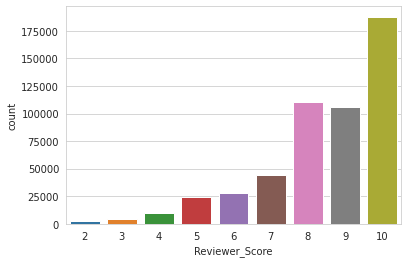

In [ ]:
columns = ['Reviewer_Score']
for x in columns:

    sns.countplot(data[x])
    plt.show()

In [ ]:
!pip install scikit-plot

In [ ]:
data['Reviewer_Score'].value_counts(normalize=True)*100

10    36.402980
8     21.358713
9     20.499168
7      8.548527
6      5.390334
5      4.689978
4      1.829611
3      0.854310
2      0.426379
Name: Reviewer_Score, dtype: float64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import scikitplot as skplt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
data['Clean']=data['Clean'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(data['Clean'], data['Reviewer_Score'], test_size = 0.30)
#data['Reviews']= data['Reviews'].astype(str)
#X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['Sentiment_2'], test_size = 0.30)

In [ ]:
X_train.shape

(361016,)

In [ ]:
import pandas as pd  
import numpy as np
import time

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import resample
# plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, Dense, Embedding, LSTM, SpatialDropout1D, Input, MaxPooling1D,Flatten, GRU, Conv2D, Reshape, MaxPool2D, Concatenate, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, Dense, concatenate, Activation
from nltk.corpus import stopwords
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
use_gpu=True
from keras import backend as K
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=100)
X_text_seq_padded = pad_sequences(X_test_seq, maxlen=100)

#Converting labels to one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
data['Reviewer_Score'].value_counts()

10    187744
8     110155
9     105722
7      44088
6      27800
5      24188
4       9436
3       4406
2       2199
Name: Reviewer_Score, dtype: int64

In [ ]:
size_of_vocabulary = len(tokenizer.word_index)+1

In [ ]:
embedding_file = r'/content/drive/MyDrive/Colab Notebooks/ABCDM-main/glove.6B.200d.txt'

In [ ]:
# loading embeddings

embedding_index = {}
f = open(embedding_file, 'r', errors = 'ignore',encoding='utf8')

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[word]=coefs

f.close()
print(f"Loaded {len(embedding_index)} word vectors")

Loaded 400000 word vectors


In [ ]:
len(embedding_index)

400000

In [ ]:
# Creating word matrix for words using embeddings
embedding_matrix = np.zeros((size_of_vocabulary,200))

for word, i in tokenizer.word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **LSTM**

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 200, weights = [embedding_matrix], trainable = False))
#model.add(Embedding(input_dim=size_of_vocabulary,output_dim=100))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(16, recurrent_dropout =0.2)))
# model.add(AttentionWithContext())
model.add(Dense(32, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         12729000  
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          67840     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                363       
Total params: 12,810,675
Trainable params: 81,675
Non-trainable params: 12,729,000
_______________________________________

In [ ]:
model.compile(Adam(lr = 0.0002), loss = 'categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

In [ ]:
history_LSTM = model.fit(X_train_seq_padded, y_train, batch_size=512, epochs=20,
                         validation_data=(X_text_seq_padded, y_test), verbose = 2)

Epoch 1/20
706/706 - 27s - loss: 1.2608 - accuracy: 0.4772 - recall_m: 0.2333 - precision_m: 0.7181 - f1_m: 0.3517 - val_loss: 1.2725 - val_accuracy: 0.4697 - val_recall_m: 0.2188 - val_precision_m: 0.7297 - val_f1_m: 0.3363
Epoch 2/20
706/706 - 27s - loss: 1.2586 - accuracy: 0.4774 - recall_m: 0.2343 - precision_m: 0.7176 - f1_m: 0.3527 - val_loss: 1.2761 - val_accuracy: 0.4706 - val_recall_m: 0.2336 - val_precision_m: 0.7093 - val_f1_m: 0.3512
Epoch 3/20
706/706 - 27s - loss: 1.2571 - accuracy: 0.4780 - recall_m: 0.2346 - precision_m: 0.7178 - f1_m: 0.3531 - val_loss: 1.2722 - val_accuracy: 0.4717 - val_recall_m: 0.2416 - val_precision_m: 0.6996 - val_f1_m: 0.3589
Epoch 4/20
706/706 - 27s - loss: 1.2555 - accuracy: 0.4785 - recall_m: 0.2356 - precision_m: 0.7187 - f1_m: 0.3543 - val_loss: 1.2755 - val_accuracy: 0.4673 - val_recall_m: 0.2111 - val_precision_m: 0.7396 - val_f1_m: 0.3282
Epoch 5/20
706/706 - 27s - loss: 1.2535 - accuracy: 0.4790 - recall_m: 0.2353 - precision_m: 0.7185 

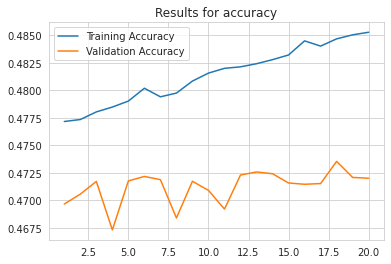

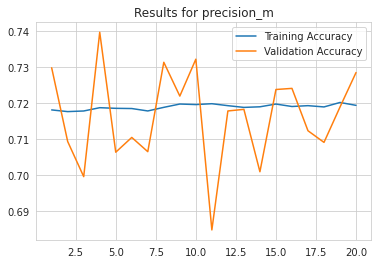

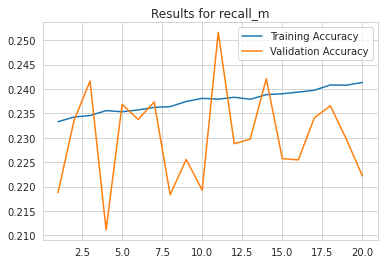

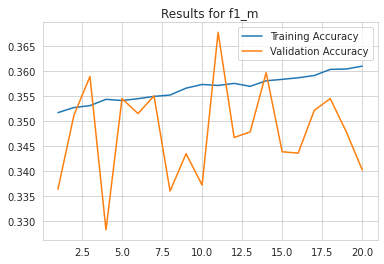

In [ ]:
for i in ['accuracy','precision_m','recall_m','f1_m']:
    acc = history_LSTM.history[i]
    val_acc = history_LSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

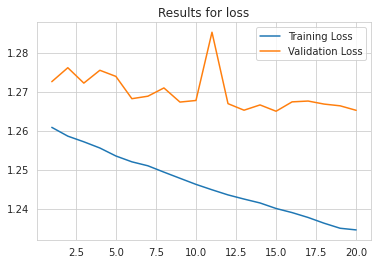

In [ ]:
for i in ['loss']:
    acc = history_LSTM.history[i]
    val_acc = history_LSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [ ]:
#Generating Classification report
y_pred_LSTM=np.argmax(model.predict(X_text_seq_padded),axis=-1)
y_test_LSTM=np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(y_test_LSTM,y_pred_LSTM))

              precision    recall  f1-score   support

           2       0.30      0.12      0.17       662
           3       0.35      0.10      0.15      1356
           4       0.32      0.12      0.17      2878
           5       0.31      0.44      0.36      7197
           6       0.26      0.11      0.15      8292
           7       0.27      0.11      0.16     13026
           8       0.37      0.55      0.44     33081
           9       0.38      0.16      0.23     31773
          10       0.64      0.80      0.71     56457

    accuracy                           0.48    154722
   macro avg       0.36      0.28      0.28    154722
weighted avg       0.45      0.48      0.44    154722



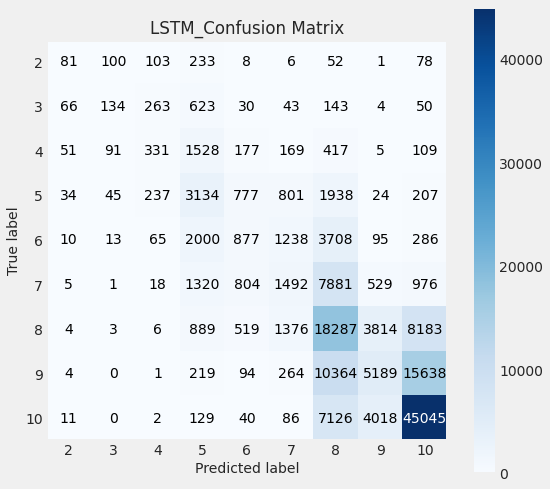

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test_LSTM,y_pred_LSTM,figsize=(8,8),cmap='Blues',title=('LSTM_Confusion Matrix'))

# **Bi-LSTM**

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))

#model.add(LSTM(32, recurrent_dropout =0.2))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(8)))
model.add(Dropout(0.2))

# model.add(AttentionWithContext())
# model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         6349400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 32)          14976     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                2624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                187       
Total params: 6,367,187
Trainable params: 17,787
Non-trainable params: 6,349,400
_________________________________________________________________


In [ ]:
model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

In [ ]:
history_BiLSTM = model.fit(X_train_seq_padded, y_train, batch_size=256, epochs=15,
                         validation_data=(X_text_seq_padded, y_test), verbose = 1)

Epoch 1/15
1411/1411 [==============================] - 41s 26ms/step - loss: 1.6343 - accuracy: 0.3895 - recall_m: 0.1320 - precision_m: 0.5405 - f1_m: 0.2074 - val_loss: 1.3390 - val_accuracy: 0.4518 - val_recall_m: 0.2227 - val_precision_m: 0.6986 - val_f1_m: 0.3372
Epoch 2/15
1411/1411 [==============================] - 35s 25ms/step - loss: 1.3546 - accuracy: 0.4474 - recall_m: 0.2093 - precision_m: 0.7038 - f1_m: 0.3217 - val_loss: 1.3091 - val_accuracy: 0.4609 - val_recall_m: 0.2347 - val_precision_m: 0.6960 - val_f1_m: 0.3505
Epoch 3/15
1411/1411 [==============================] - 34s 24ms/step - loss: 1.3267 - accuracy: 0.4569 - recall_m: 0.2163 - precision_m: 0.7091 - f1_m: 0.3305 - val_loss: 1.3075 - val_accuracy: 0.4608 - val_recall_m: 0.2401 - val_precision_m: 0.6949 - val_f1_m: 0.3564
Epoch 4/15
1411/1411 [==============================] - 34s 24ms/step - loss: 1.3120 - accuracy: 0.4617 - recall_m: 0.2189 - precision_m: 0.7105 - f1_m: 0.3337 - val_loss: 1.2887 - val_accur

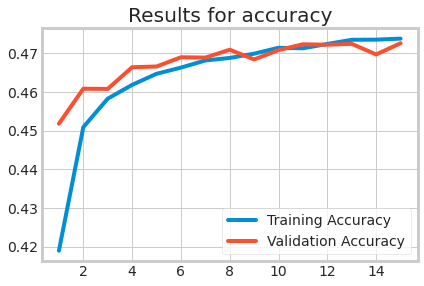

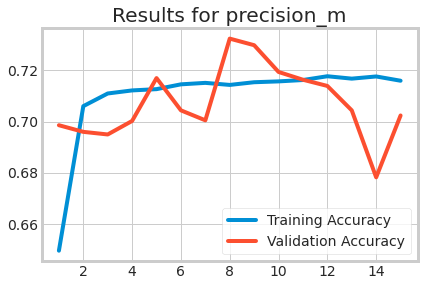

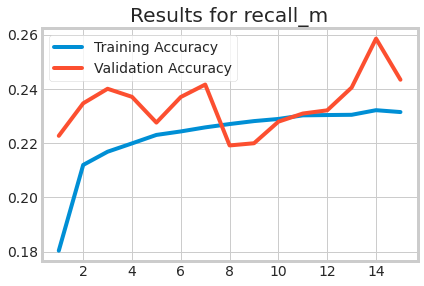

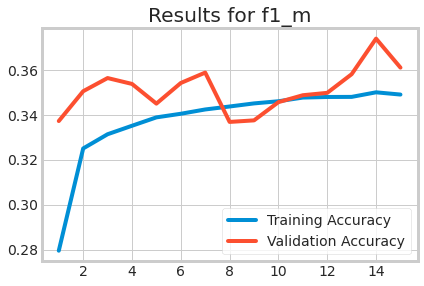

In [ ]:
sns.set_style("whitegrid")
for i in ['accuracy','precision_m','recall_m','f1_m']:
    acc = history_BiLSTM.history[i]
    val_acc = history_BiLSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

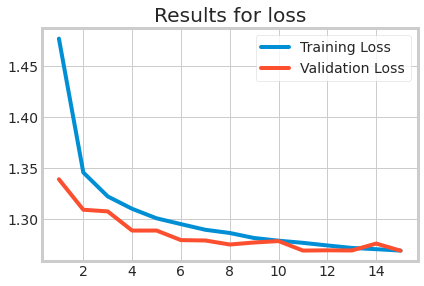

In [ ]:
for i in ['loss']:
    acc = history_BiLSTM.history[i]
    val_acc = history_BiLSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [ ]:
#Generating Classification report
y_pred_Bi=np.argmax(model.predict(X_text_seq_padded),axis=-1)
y_test_Bi=np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(y_test_Bi,y_pred_Bi))

              precision    recall  f1-score   support

           2       0.31      0.10      0.15       634
           3       0.32      0.13      0.19      1332
           4       0.32      0.09      0.14      2899
           5       0.30      0.43      0.35      7346
           6       0.26      0.08      0.13      8395
           7       0.27      0.07      0.12     13209
           8       0.35      0.54      0.43     32848
           9       0.37      0.11      0.17     31718
          10       0.61      0.83      0.70     56341

    accuracy                           0.47    154722
   macro avg       0.35      0.27      0.26    154722
weighted avg       0.43      0.47      0.42    154722



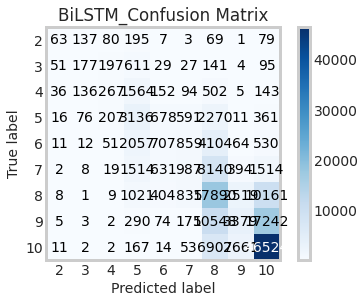

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test_Bi,y_pred_Bi,cmap='Blues',title=('BiLSTM_Confusion Matrix'))

# **GRU**

In [ ]:
gru_model=Sequential()
gru_model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
gru_model.add(GRU(40,return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(11,activation='softmax'))
gru_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         6734100   
_________________________________________________________________
gru_2 (GRU)                  (None, 40)                17040     
_________________________________________________________________
dropout_10 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 11)                451       
Total params: 6,751,591
Trainable params: 17,491
Non-trainable params: 6,734,100
_________________________________________________________________


In [ ]:
gru_model.compile(Adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

In [ ]:
history_GRU = gru_model.fit(X_train_seq_padded, y_train, batch_size=512, epochs=50,
                         validation_data=(X_text_seq_padded, y_test), verbose = 1)

Epoch 1/50
706/706 [==============================] - 15s 19ms/step - loss: 1.7947 - accuracy: 0.3287 - recall_m: 0.0683 - precision_m: 0.4320 - f1_m: 0.1135 - val_loss: 1.3928 - val_accuracy: 0.4401 - val_recall_m: 0.1948 - val_precision_m: 0.7106 - val_f1_m: 0.3055
Epoch 2/50
706/706 [==============================] - 13s 18ms/step - loss: 1.3892 - accuracy: 0.4355 - recall_m: 0.2171 - precision_m: 0.6874 - f1_m: 0.3294 - val_loss: 1.3379 - val_accuracy: 0.4531 - val_recall_m: 0.2433 - val_precision_m: 0.6702 - val_f1_m: 0.3568
Epoch 3/50
706/706 [==============================] - 13s 18ms/step - loss: 1.3349 - accuracy: 0.4517 - recall_m: 0.2235 - precision_m: 0.6989 - f1_m: 0.3381 - val_loss: 1.3184 - val_accuracy: 0.4574 - val_recall_m: 0.2538 - val_precision_m: 0.6608 - val_f1_m: 0.3665
Epoch 4/50
706/706 [==============================] - 13s 18ms/step - loss: 1.3173 - accuracy: 0.4578 - recall_m: 0.2259 - precision_m: 0.7023 - f1_m: 0.3413 - val_loss: 1.2993 - val_accuracy: 0.4

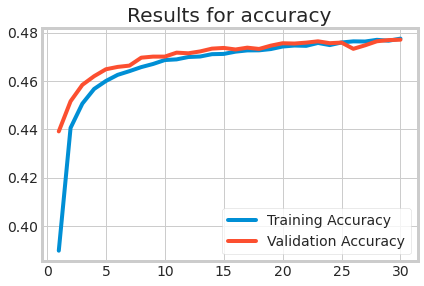

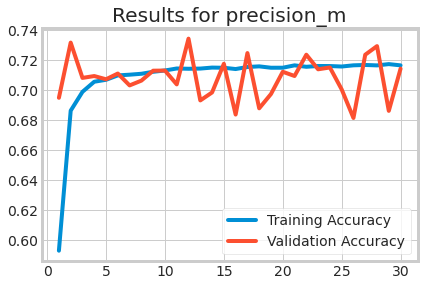

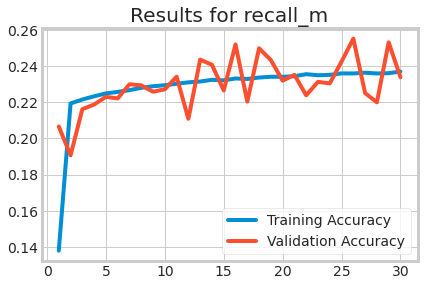

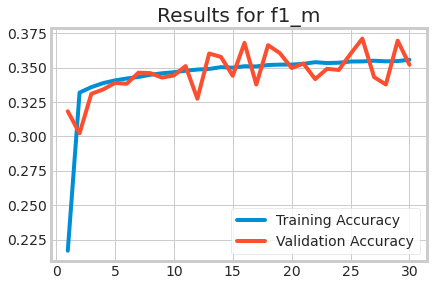

In [ ]:
sns.set_style("whitegrid")
for i in ['accuracy','precision_m','recall_m','f1_m']:
    acc = history_GRU.history[i]
    val_acc = history_GRU.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

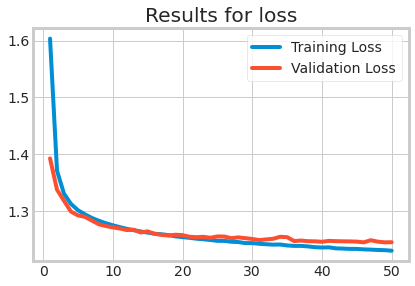

In [ ]:
for i in ['loss']:
    acc = history_GRU.history[i]
    val_acc = history_GRU.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()